In [3]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [4]:
data = pd.read_excel(r'C:\Users\jeanm\Desktop\trips_per_user.xlsx')

In [3]:
data.columns

Index(['index', 'prefered_mode', 'weighted_avg_distance', 'prefered_day',
       'weighted_avg_shopping_time', 'weighted_avg_trip_duration', 'Age',
       'Gender', 'City_density', 'House_composition', 'Education_level',
       'Profession', 'Car_ownership', 'Household_size', 'Anual_income',
       'Driving_license', 'num_trips'],
      dtype='object')

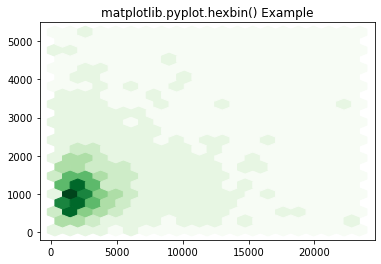

In [49]:
a = data[data.weighted_avg_distance < 10000]
a = data[data.weighted_avg_trip_duration < 1500]

a = a[a.num_trips < 10]
plt.hexbin(a.weighted_avg_distance, a.weighted_avg_shopping_time, gridsize = 20, cmap ='Greens', bins = 10) 
plt.title('matplotlib.pyplot.hexbin() Example') 
plt.show() 

In [50]:
a.columns

Index(['index', 'prefered_mode', 'weighted_avg_distance', 'prefered_day',
       'weighted_avg_shopping_time', 'weighted_avg_trip_duration', 'Age',
       'Gender', 'City_density', 'House_composition', 'Education_level',
       'Profession', 'Car_ownership', 'Household_size', 'Anual_income',
       'Driving_license', 'num_trips'],
      dtype='object')

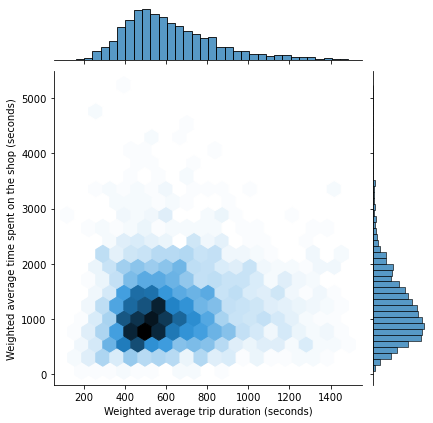

In [59]:
fig = sns.jointplot(x='weighted_avg_trip_duration',y='weighted_avg_shopping_time',data=a,kind='hex',gridsize=20)
fig.set_axis_labels('Weighted average trip duration (seconds)', 'Weighted average time spent on the shop (seconds)')


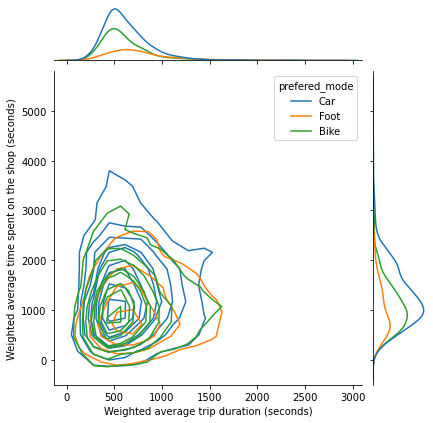

In [60]:
fig=sns.jointplot(x='weighted_avg_trip_duration',y='weighted_avg_shopping_time',data=data,kind='kde',gridsize=20, hue = 'prefered_mode')
fig.set_axis_labels('Weighted average trip duration (seconds)', 'Weighted average time spent on the shop (seconds)')


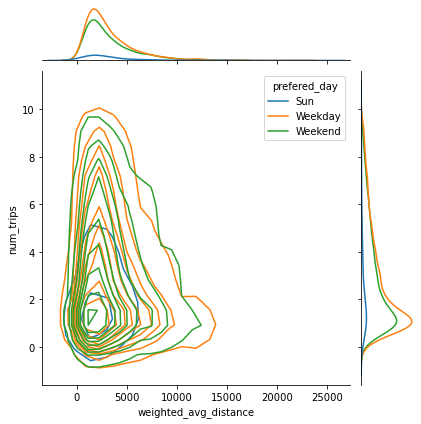

In [53]:
sns.jointplot(x='weighted_avg_distance',y='num_trips',data=a,kind='kde',gridsize=20, hue = 'prefered_day')

In [31]:
data.weighted_avg_shopping_time.mean()

1199.1657917033524

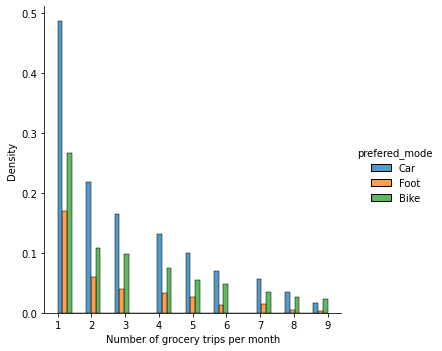

In [56]:
fig = sns.displot(a, x="num_trips", hue="prefered_mode", stat="density",multiple="dodge", common_norm=True)
fig.set_axis_labels('Number of grocery trips per month', 'Density')


In [58]:
a.weighted_avg_shopping_time.mean()

1206.9751873270495

In [ ]:
fig.set_axis_labels('Weighted average distance (meters)', 'Weighted average time spent on the shop (seconds)')


Text(0.5, 1.0, 'Distribution of transportation choices')

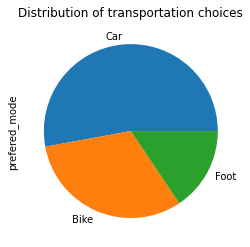

In [66]:
ax = data['prefered_mode'].value_counts(normalize = True).plot(kind='pie')
ax.set_title("Distribution of transportation choices")


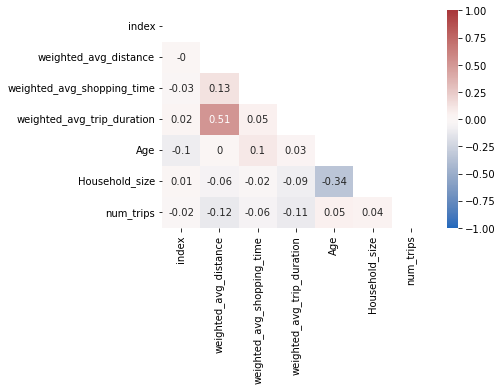

In [6]:
matrix = data.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype = bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

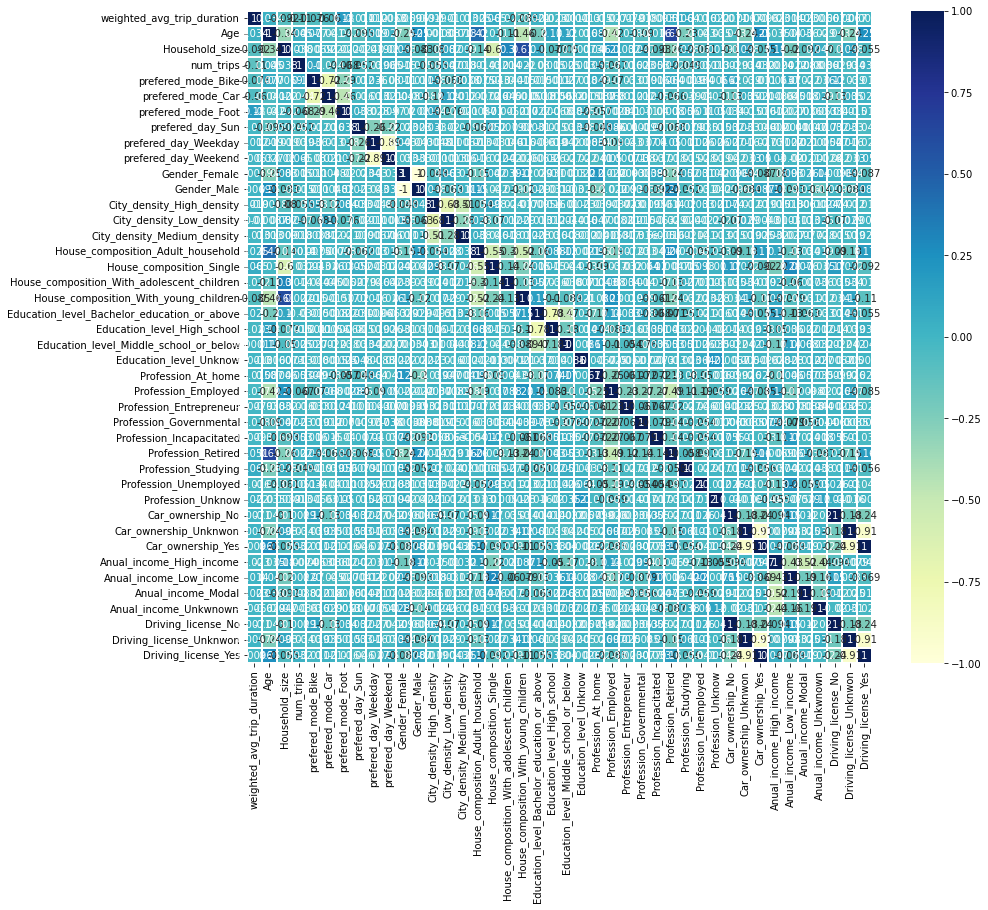

In [5]:
dfDummies = pd.get_dummies(data)
dfDummies.drop(['index', 'weighted_avg_distance', 'weighted_avg_shopping_time'], axis=1, inplace=True)
plt.figure(figsize=(14,12))
sns.heatmap(dfDummies.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [6]:
matrix = dfDummies.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.7]

print(matrix)

weighted_avg_trip_duration                   weighted_avg_trip_duration                     1.000000
Age                                          Age                                            1.000000
Household_size                               Household_size                                 1.000000
num_trips                                    num_trips                                      1.000000
prefered_mode_Bike                           prefered_mode_Bike                             1.000000
                                             prefered_mode_Car                             -0.718764
prefered_mode_Car                            prefered_mode_Bike                            -0.718764
                                             prefered_mode_Car                              1.000000
prefered_mode_Foot                           prefered_mode_Foot                             1.000000
prefered_day_Sun                             prefered_day_Sun                              

In [15]:
new = dfDummies[['Household_size', 'House_composition_With_adolescent_children', 'Age','Gender_Female', 'Gender_Male', 'Driving_license_No', 'Driving_license_Yes', 'Car_ownership_Unknwon', 'Car_ownership_Yes', 'Car_ownership_Unknwon', 'Driving_license_Unknwon', 'prefered_mode_Bike', 'prefered_mode_Car', 'prefered_mode_Foot', 'Anual_income_High_income', 'Anual_income_Low_income', 'Education_level_Bachelor_education_or_above']]

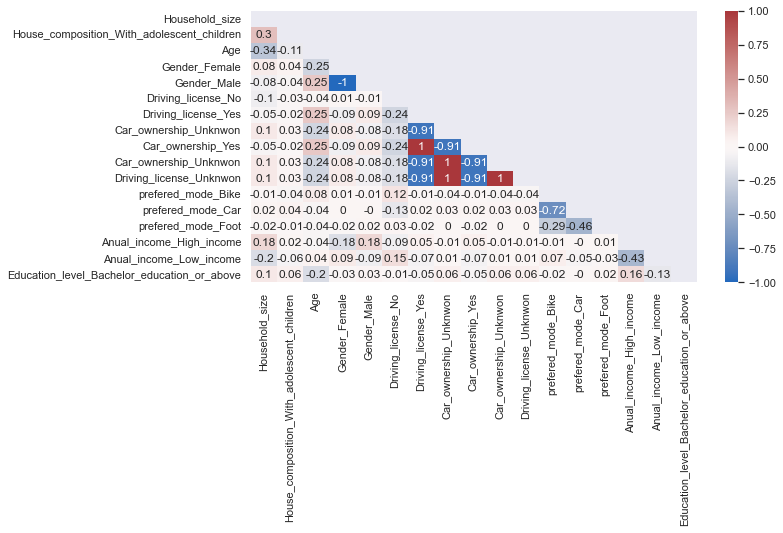

In [16]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
matrix = new.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()